In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_sales_data.csv')
df.drop(columns="Unnamed: 0",inplace = True, errors = 'ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...


In [3]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


##Box plot

the median is line in the box, and the mean is a point

<Axes: >

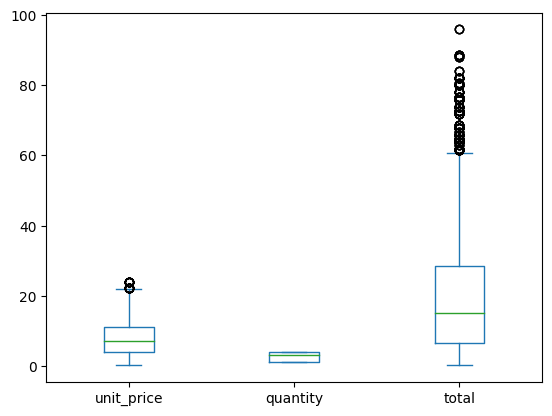

In [5]:
df.plot(kind = 'box')

<Axes: ylabel='Frequency'>

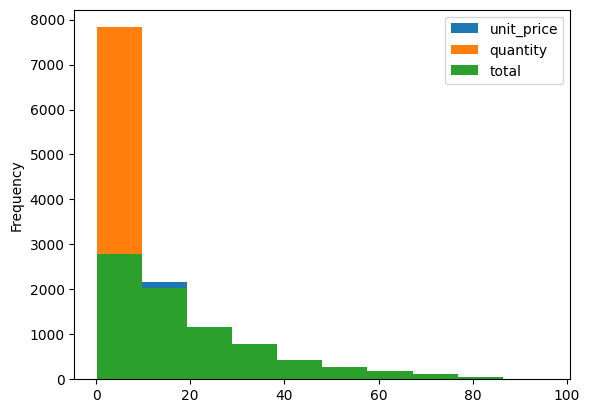

In [6]:
df.plot(kind = 'hist', bins = 10)

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [16]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  for i in column: 
    sns.displot(data, x=i, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  sns.heatmap(corr,cmap='coolwarm', annot = True,square = True )

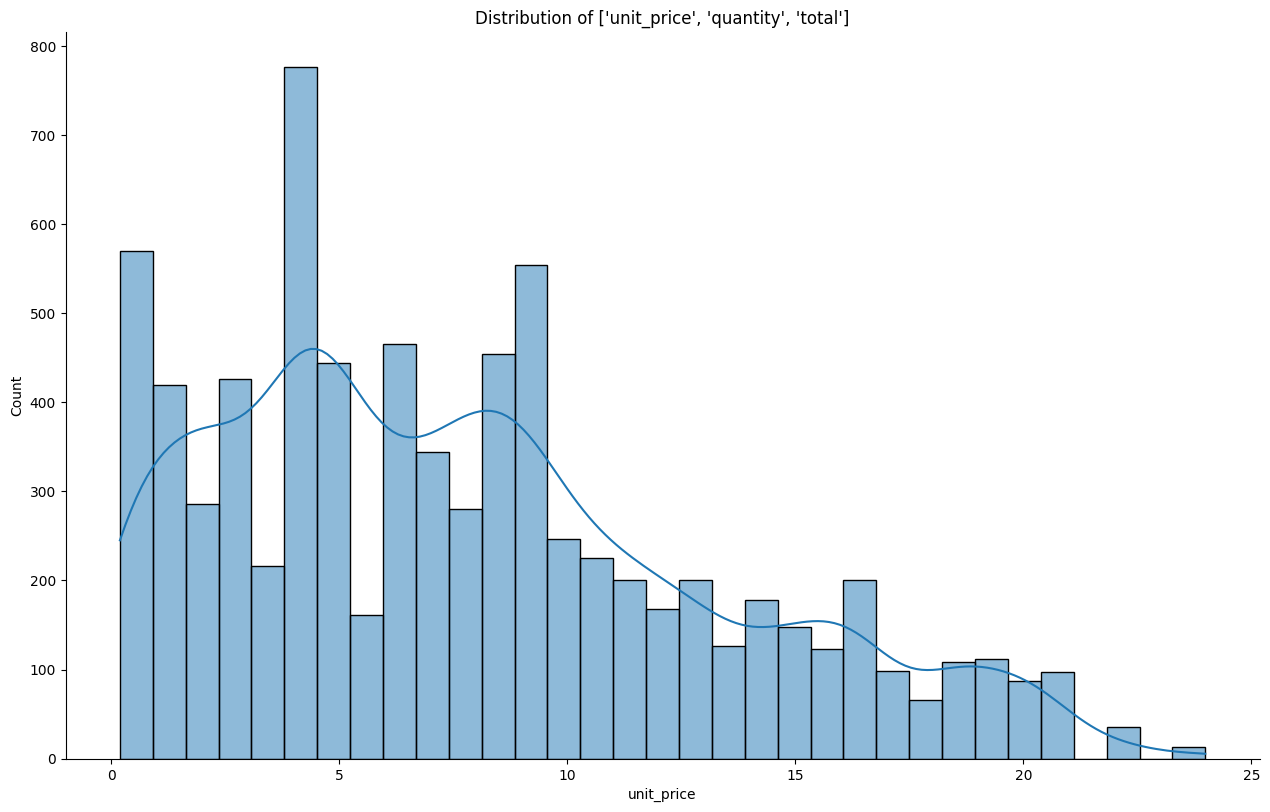

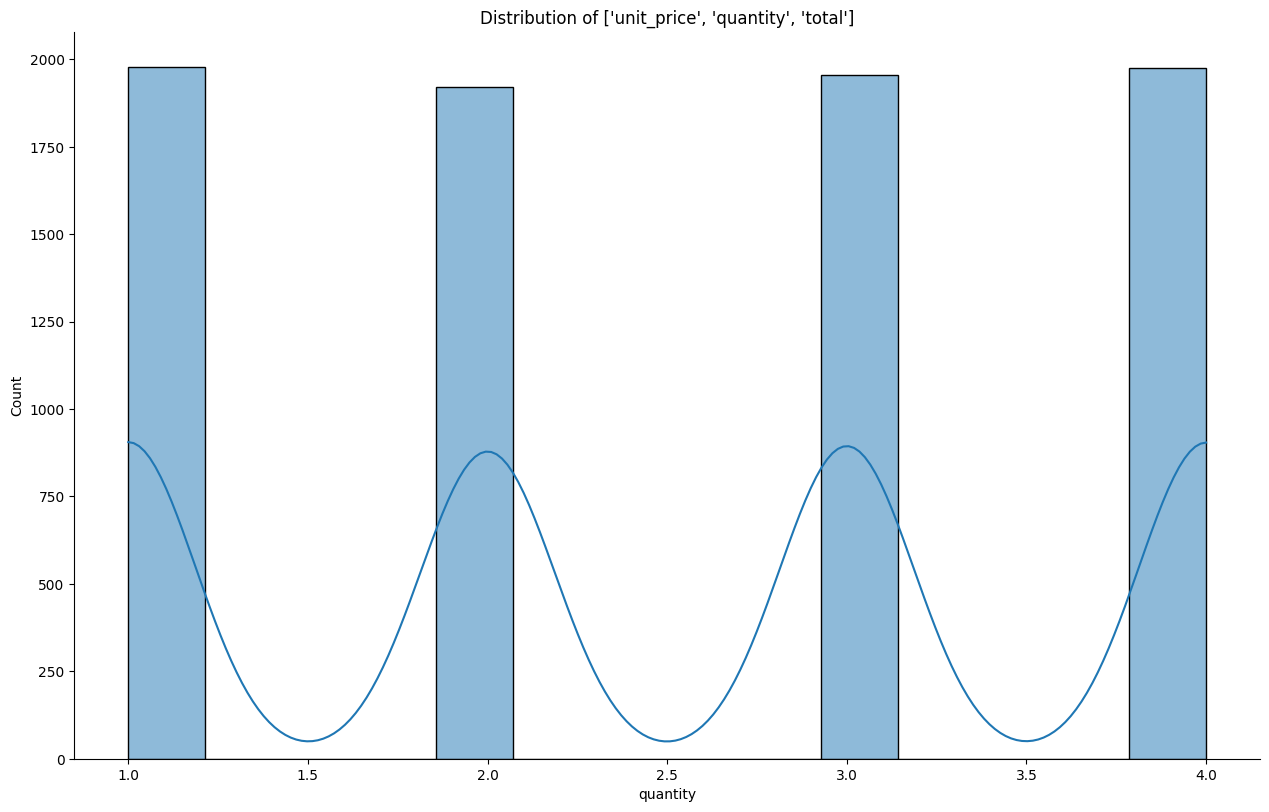

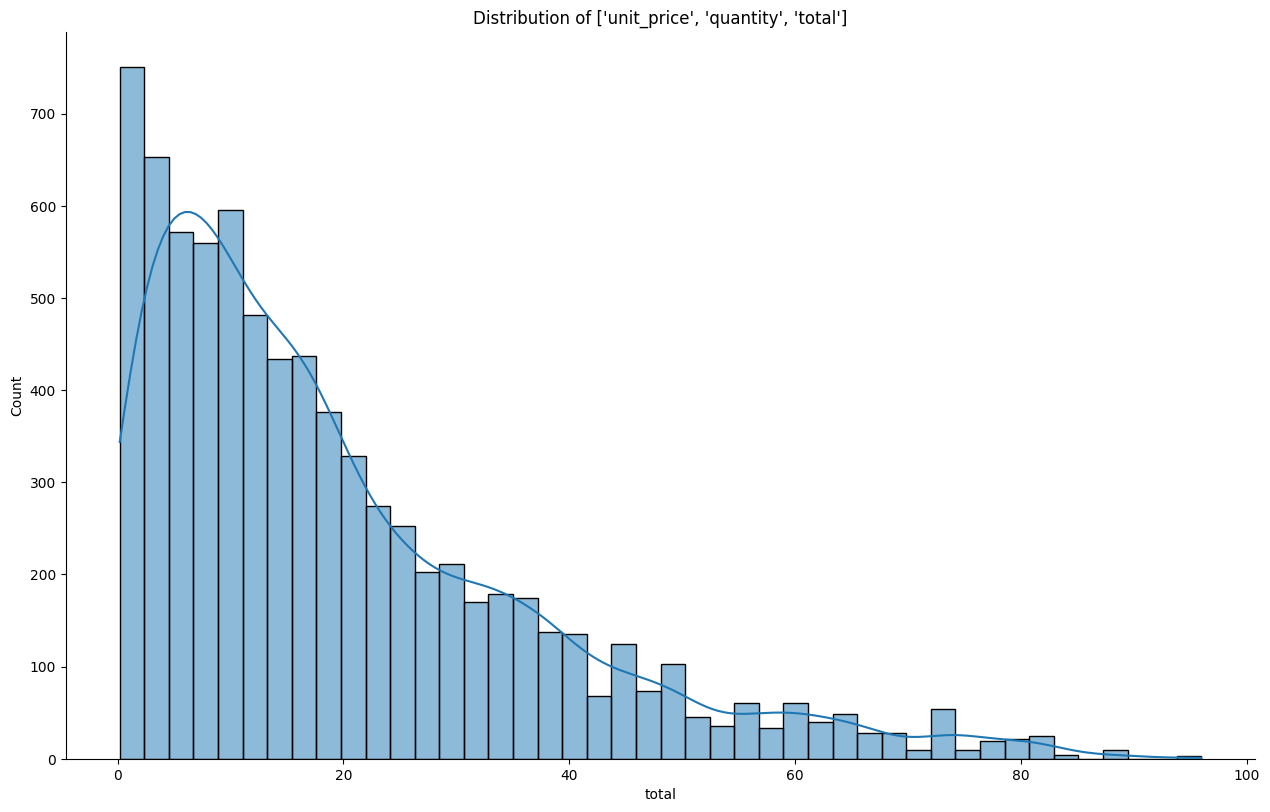

In [8]:
plot_continuous_distribution(df, ['unit_price', 'quantity', 'total'])

<ipython-input-16-dda7b07a5da7>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


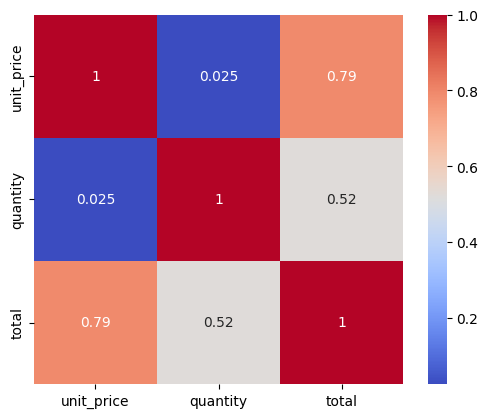

In [17]:
correlation_plot(df)